<a href="https://colab.research.google.com/github/jmquintana/copa_america/blob/main/copa_america.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import random as rnd

In [2]:
# Le doy formato a los gráficos
sns.set_style("darkgrid")
plt.rc('font', size=10)
plt.rc('axes', titlesize=16)
plt.rc('figure', titlesize=16)
plt.rc('axes', labelsize=14) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

In [3]:
#Seteamos para que no utilice notacion cientifica
pd.options.display.float_format = '{:.4f}'.format
#Seteo para que el máximo de columnas que muestra al levantar una base sean 500
pd.set_option('display.max_columns',500)
#Estos códigos hacen que la visualización de la consola abarque toda la pantalla (sin los recortes a los costados). Tambien hacen que al mostrar dataframes podamos ver todas las columnas que tiene.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Codigo para poder imprimir multiples outputs en una misma línea
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Monto mi Google Drive para cargar el DataSet
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Cargo el DataSet con Pandas como un DataFrame nombrado "df"
# Previamente debe descargarse del siguiente link: https://www.kaggle.com/ramnquintana/resultados-de-futbol-entre-1872-y-2017?select=results.csv
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/results.csv")

In [7]:
print("Columnas:",df.shape[1])
print("Filas:",df.shape[0])

Columnas: 9
Filas: 41243


In [8]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [18]:
# convert the 'Date' column to datetime format
df['date'] = df['date'].astype('datetime64[ns]')

In [19]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [20]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [32]:
teams = ['Argentina',
          'Chile',
          'Paraguay',
          'Uruguay',
          'Bolivia',
          'Brazil',
          'Colombia',
          'Peru',
          'Venezuela',
          'Ecuador']

In [33]:
df2 = df[df.date > '2010-01-01']
df2 = df2[df2.home_team.isin(teams) & df2.away_team.isin(teams)]
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
31987,2010-03-31,Chile,Venezuela,0,0,Friendly,Temuco,Chile,False
32168,2010-06-28,Brazil,Chile,3,0,FIFA World Cup,Johannesburg,South Africa,True
32196,2010-08-11,Bolivia,Colombia,1,1,Friendly,La Paz,Bolivia,False
32277,2010-09-03,Venezuela,Colombia,0,2,Friendly,Puerto la Cruz,Venezuela,False
32343,2010-09-07,Venezuela,Ecuador,1,0,Friendly,Barquisimeto,Venezuela,False


In [43]:
df2_1 = df2[['date', 'home_team', 'home_score', 'away_score']].rename({'home_team':'team', 'home_score':'team_score', 'away_score':'opponent_score'}, axis=1)
df2_2 = df2[['date', 'away_team', 'away_score', 'home_score']].rename({'away_team':'team', 'away_score':'team_score', 'home_score':'opponent_score'}, axis=1)
df3 = df2_1.append(df2_2).sort_values('date').reset_index(drop=True)
df3.head()

,date,team,team_score,opponent_score
0,2010-03-31,Chile,0,0
1,2010-03-31,Venezuela,0,0
2,2010-06-28,Brazil,3,0
3,2010-06-28,Chile,0,3
4,2010-08-11,Bolivia,1,1


In [81]:
vs = ['Argentina', 'Brazil']
df_vs = df3[df3.team.isin(vs)]
df_ar = df3[df3.team == 'Argentina']
df_br = df3[df3.team == 'Brazil']

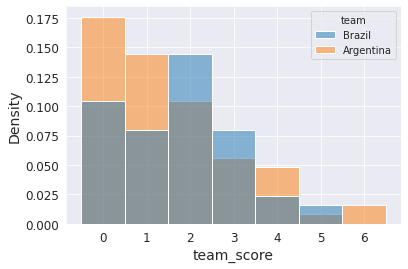

In [80]:
sns.histplot(data=df_vs, x='team_score', discrete=True, stat="density", hue='team')
plt.xticks([0,1,2,3,4,5,6])
plt.show()

In [89]:
ar_meanpts = df_ar.team_score.mean()
br_meanpts = df_br.team_score.mean()
ar_sdpts = df_ar.team_score.std()
br_sdpts = df_br.team_score.std()

ar_meanopp = df_ar.opponent_score.mean()
br_meanopp = df_br.opponent_score.mean()
ar_sdopp = df_ar.opponent_score.std()
br_sdopp = df_br.opponent_score.std()

In [90]:
def gameSim():
    ARScore = (rnd.gauss(ar_meanpts,ar_sdpts)+ rnd.gauss(br_meanopp,br_sdopp))/2
    BRScore = (rnd.gauss(br_meanpts,br_sdpts)+ rnd.gauss(ar_meanopp,ar_sdopp))/2
    if int(round(ARScore)) > int(round(BRScore)):
        return 1
    elif int(round(ARScore)) < int(round(BRScore)):
        return -1
    else: return 0

In [103]:
def gamesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print('AR Win ', team1win/(team1win+team2win+tie),'%')
    print('BR Win ', team2win/(team1win+team2win+tie),'%')
    print('Tie ', tie/(team1win+team2win+tie), '%')
    return

In [106]:
gamesSim(1000)

AR Win  0.31 %
BR Win  0.382 %
Tie  0.308 %
